# **Exercício 2 - Perceptron de Rosenblatt**

Renan Hideo Watanabe NUSP.: 4777842

Sophia Celine Rafael Alves Pereira NUSP.: 11803994

## **Set up e definição do dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://media.githubusercontent.com/media/psi3471/datasets/main/circles_vs_rects_dataset/circles_and_squares.csv

--2024-04-14 21:58:48--  https://media.githubusercontent.com/media/psi3471/datasets/main/circles_vs_rects_dataset/circles_and_squares.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1605994 (1.5M) [text/plain]
Saving to: ‘circles_and_squares.csv.1’

circles_and_squares 100%[===================>]   1.53M  --.-KB/s    in 0.06s   

2024-04-14 21:58:48 (26.6 MB/s) - ‘circles_and_squares.csv.1’ saved [1605994/1605994]



In [ ]:
import pandas as pd
data_df = pd.read_csv("circles_and_squares.csv")

In [ ]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data = data_df.to_numpy()
data_df.shape

(1000, 401)

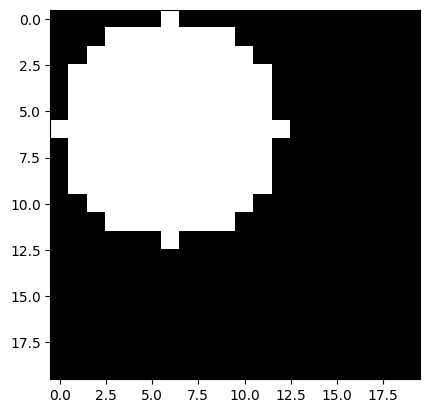

In [ ]:
import matplotlib.pyplot as plt
img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

In [ ]:
data[0, 400]


-1.0

1.0


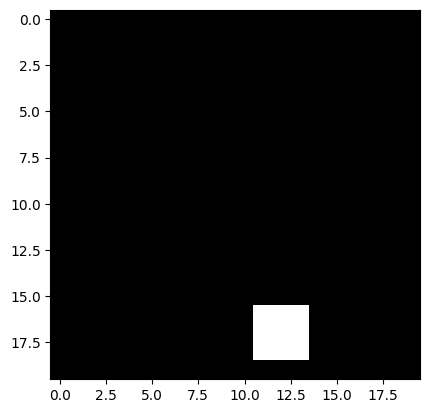

In [ ]:
img = data[4, :-1].reshape((20,20))
print(data[4, -1])
plt.imshow(img, cmap='gray')

In [ ]:
Xd = data[:800, :]
Xd_test = data[800:, :]

## **Rosenblatt no modo mini-batch**

Definição da função do perceptron de Rosenblatt conforme mostrado em aula:

In [ ]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    #############
    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = np.random.uniform((dw*(-1)), dw, ((Ne * Nmb + 1, M + 1)))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            dmb = d[l * Nb : (l + 1) * Nb]
            xmb = x[l * Nb : (l + 1) * Nb, :]
            m = k*Nmb + l
            emb = dmb - np.heaviside(xmb @ W[[m], :].T, 1)
            g = xmb.T @ emb
            W[[m + 1], :] = W[[m], :] + eta * g.T

    return W

Parâmetros para o modo mini-batch:

In [ ]:
eta = 0.005  # passo de adaptação do algoritmo de Rosenblatt
Nb = 200 # Tamanho do mini-batch
Ne = 10 # Número de épocas
dw = 100 # Desvio padrão para inicialização de w
Nt = 800 # Número de dados de treinamento

x = Xd[:, :400]
d = Xd[:, [400]]

W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

In [ ]:
itRes = Ne * int(np.floor(Nt / Nb))
WRes = W[[itRes], :]

Text(0.5, 0, 'iterações')

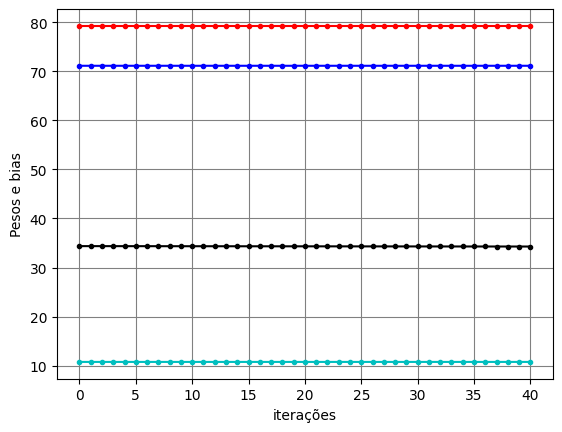

In [ ]:
plt.figure()
# Mostra os valores dos pesos ao longo das épocas
plt.plot(W[:, 0], ".-k", label="Rosenblatt")
plt.plot(W[:, 1], ".-r", label="Rosenblatt")
plt.plot(W[:, 2], ".-b", label="Rosenblatt")
plt.plot(W[:, 3], ".-c", label="Rosenblatt")
plt.ylabel("Pesos e bias")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("iterações")

In [ ]:
y_est = 2*np.heaviside(Xd_test @ WRes.T, 1) - 1

In [ ]:
y_TreinoEst = 2*np.heaviside(Xd @ WRes.T, 1) - 1
erroTreino = pd.DataFrame(Xd[:, [400]]).subtract(y_TreinoEst).to_numpy()
mseTreino = np.sum(((erroTreino)**2) / len(erroTreino))


In [ ]:
erroTeste = pd.DataFrame(Xd_test[:, [400]]).subtract(y_est).to_numpy()

mse = np.sum(((erroTeste)**2) / len(erroTeste))

In [ ]:
print("Erro quadratico médio: ", np.sum((erroTeste)**2) / len(erroTeste))
taxaErro = 0
for i in range(len(erroTeste)):
  if(erroTeste[i] != 0):
    taxaErro += 1
taxaErro = (taxaErro/len(erroTeste))*100
print("taxa de erro: ",taxaErro)

Erro quadratico médio:  1.44
taxa de erro:  36.0


In [ ]:
print("Erro quadratico médio: ", np.sum((erroTreino)**2) / len(erroTreino))
taxaErro = 0
for i in range(len(erroTreino)):
  if(erroTreino[i] != 0):
    taxaErro += 1
taxaErro = (taxaErro/len(erroTreino))*100
print("taxa de erro: ",taxaErro)

Erro quadratico médio:  1.345
taxa de erro:  33.625


In [ ]:
unique, counts = np.unique(Xd_test[:, [400]], return_counts=True)
print("Frequências de quadrados e círculos no dataset: ")
print("Valor    f")
print(np.asarray((unique, counts)).T)

Frequências de quadrados e círculos no dataset: 
Valor    f
[[ -1.  96.]
 [  1. 104.]]


In [ ]:
unique, counts = np.unique(y_est, return_counts=True)
print("Frequências de quadrados e círculos na estimativa: ")
print("Valor    f")
print(np.asarray((unique, counts)).T)

Frequências de quadrados e círculos na estimativa: 
Valor    f
[[ -1. 108.]
 [  1.  92.]]


In [ ]:
quadradoOuCirculo = list()
for i in range(0, y_est.shape[0]):
  if (y_est[i, 0] == -1):
   quadradoOuCirculo.append("Círculo")
  else:
    quadradoOuCirculo.append("Quadrado")

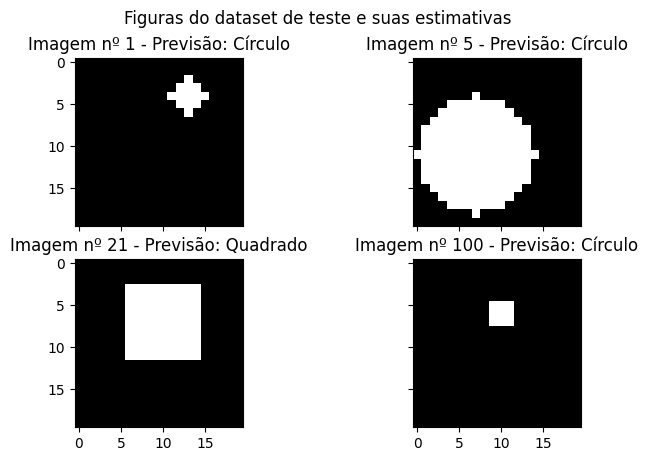

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figwidth(8)

### Escolha o numero das imagens a serem visualizadas: ####
exemplos = [1, 5, 21, 100]
###################################################### ####

fig.suptitle('Figuras do dataset de teste e suas estimativas')
ax1.imshow(Xd_test[exemplos[0], :-1].reshape((20,20)), cmap='gray')
ax1.set_title(("Imagem nº " + str(exemplos[0]) + " - Previsão: " + str(quadradoOuCirculo[int(exemplos[0])])))

ax2.imshow(Xd_test[exemplos[1], :-1].reshape((20,20)), cmap='gray')
ax2.set_title(("Imagem nº " + str(exemplos[1]) + " - Previsão: " + str(quadradoOuCirculo[int(exemplos[1])])))

ax3.imshow(Xd_test[exemplos[2], :-1].reshape((20,20)), cmap='gray')
ax3.set_title(("Imagem nº " + str(exemplos[2]) + " - Previsão: " + str(quadradoOuCirculo[int(exemplos[2])])))

ax4.imshow(Xd_test[exemplos[3], :-1].reshape((20,20)), cmap='gray')
ax4.set_title(("Imagem nº " + str(exemplos[3]) + " - Previsão: " + str(quadradoOuCirculo[int(imagensParaPlotar[3])])))

for ax in fig.get_axes():
    ax.label_outer()